In [0]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
cpi_data = pd.read_csv('https://raw.githubusercontent.com/sembahen/Data_Files/master/consumer_px_index.csv')
cpi_data.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


Text(0.5, 1.0, 'Consumer Price Index')

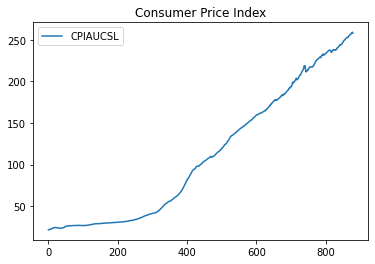

In [5]:

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
cpi_data.plot()
plt.title('Consumer Price Index')

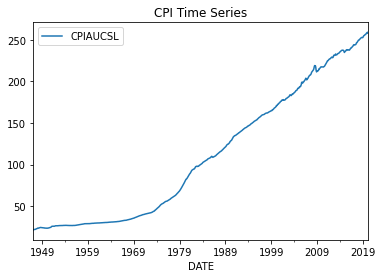

In [7]:
cpi_data.index = pd.to_datetime(cpi_data.DATE)
cpi_data.plot()
plt.title('CPI Time Series')
plt.show()

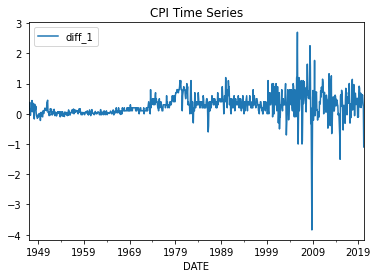

In [8]:
cpi_data['diff_1'] = cpi_data.CPIAUCSL - cpi_data.CPIAUCSL.shift()
cpi_data.plot(y='diff_1')
plt.title('CPI Time Series')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, ' PACF')

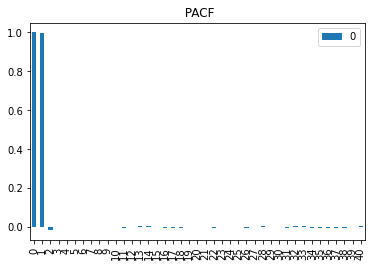

In [9]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(cpi_data.CPIAUCSL))
x_acf.plot(kind='bar')
plt.title(" PACF")

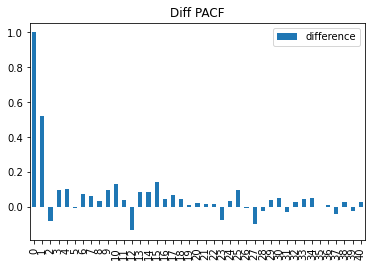

In [11]:
x_acf = pd.DataFrame(pacf(cpi_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Diff PACF")
plt.legend(['difference'])

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(cpi_data.CPIAUCSL, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  878
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -414.971
Method:                           css   S.D. of innovations              0.388
Date:                Wed, 29 Apr 2020   AIC                            833.942
Time:                        17:49:07   BIC                            843.497
Sample:                    02-01-1947   HQIC                           837.596
                         - 03-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2693      0.013     20.559      0.000       0.244       0.295
Residuals Description
count    8.780000e+02
mean     2.383429e-09
std      3.883933e-01
min     -4.111331e+00
25%     -2.093314e-01

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
